# Comparison of audio left and right stimuli 

In [1]:
%matplotlib inline

import the necessary libraries

In [2]:
import mne
import os.path as op
from matplotlib import pyplot as plt
import numpy as np

Read raw data

In [3]:
data_path = op.join(mne.datasets.sample.data_path(), 'MEG',
                    'sample', 'sample_audvis_raw.fif')
raw = mne.io.read_raw_fif(data_path, preload=True)

Opening raw data file /home/vera/mne_data/MNE-sample-data/MEG/sample/sample_audvis_raw.fif...
    Read a total of 3 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
    Range : 25800 ... 192599 =     42.956 ...   320.670 secs
Ready.
Current compensation grade : 0
Reading 0 ... 166799  =      0.000 ...   277.714 secs...


For simplicity, we select only magnetometers

In [4]:
mag_only = raw.copy().pick_types(meg='mag')

Find events

In [5]:
events = mne.find_events(raw, stim_channel='STI 014')

320 events found
Event IDs: [ 1  2  3  4  5 32]


Choose only left and right audio stimuli

In [6]:
event_id = {'Auditory/Left': 1, 'Auditory/Right': 2}

Make epochs and evoked. Save evoked to disk

In [7]:
epochs = mne.Epochs(mag_only, events, event_id, tmin=-0.1, tmax=1,
                    baseline=(None, 0), preload=True)

145 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
Created an SSP operator (subspace dimension = 3)
3 projection items activated
Loading data for 145 events and 662 original time points ...
0 bad epochs dropped


In [13]:
evoked = epochs['Auditory'].average()
evoked.save('/home/vera/MNE/Examples/sample_audleftright-ave.fif')  # save evoked data to disk
print(evoked)

<Evoked  |  '0.50 * Auditory/Left + 0.50 * Auditory/Right' (average, N=145), [-0.099898, 1.0006] sec, 102 ch, ~3.7 MB>


In [14]:
type(evoked)

mne.evoked.EvokedArray

We can read this file when it would be nessesary  

https://mne.tools/stable/auto_examples/io/plot_read_evoked.html#sphx-glr-auto-examples-io-plot-read-evoked-py

In [19]:
fname = op.join('/home/vera/MNE/Examples', 'sample_audleftright-ave.fif')
condition = "0.50 * Auditory/Left + 0.50 * Auditory/Right"
evoked = mne.read_evokeds(fname, condition=condition, baseline=(None, 0), proj=True)

print(evoked)

Reading /home/vera/MNE/Examples/sample_audleftright-ave.fif ...
    Read a total of 3 projection items:
        PCA-v1 (1 x 102) active
        PCA-v2 (1 x 102) active
        PCA-v3 (1 x 102) active
    Found the data of interest:
        t =     -99.90 ...    1000.64 ms (0.50 * Auditory/Left + 0.50 * Auditory/Right)
        0 CTF compensation matrices available
        nave = 145 - aspect type = 100
Projections have already been applied. Setting proj attribute to True.
Applying baseline correction (mode: mean)
<Evoked  |  '0.50 * Auditory/Left + 0.50 * Auditory/Right' (average, N=145), [-0.099898, 1.0006] sec, 102 ch, ~3.7 MB>


In [20]:
type(evoked)

mne.evoked.Evoked

Plot evoked topomap for both stimuli 50/50 and save figure

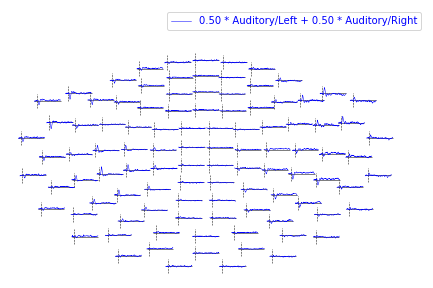

In [15]:
evoked_topomap = evoked.pick_types('mag').plot_topo(color='b', legend=True);
evoked_topomap.savefig('/home/vera/MNE/Examples/evoked_topomap.pdf')

Evokeds for all MAG channels   
https://mne.tools/dev/generated/mne.viz.plot_evoked.html

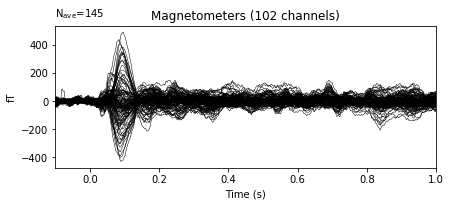

In [21]:
mne.viz.plot_evoked(evoked);

Let's apply baseline and compeare results

In [22]:
evoked_bl = evoked.apply_baseline(None, 0)

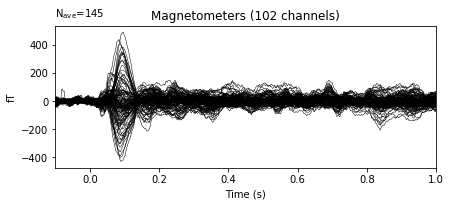

In [23]:
mne.viz.plot_evoked(evoked_bl); #for all mag channels

Need more than one channel to make topography for mag. Disabling interactivity.


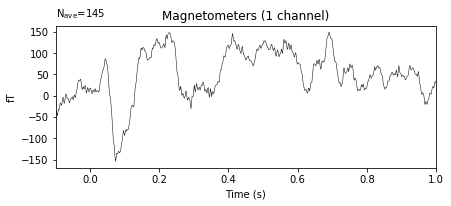

In [24]:
evoked_bl.plot(['MEG 1331']); #for one channel MEG 1331

Plot topomap vs time

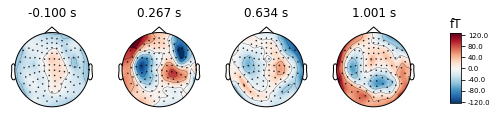

In [25]:
evoked_bl.plot_topomap();

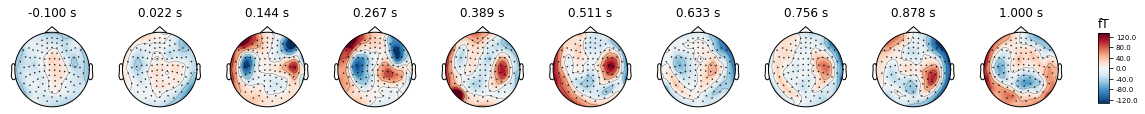

In [26]:
t = np.linspace(-0.100, 1.0, num=10) # time points in ms , задается когда мы считаем эпохи
evoked_bl.plot_topomap(times = t);

# Comparison

### Visualize Evoked data  
https://mne.tools/stable/auto_tutorials/evoked/plot_visualize_evoked.html   
### Compare evoked responses for different conditions¶
https://mne.tools/0.11/auto_examples/visualization/plot_topo_compare_conditions.html¶

In [27]:
conds_we_care_about = ['Auditory/Left', 'Auditory/Right']
epochs.equalize_event_counts(conds_we_care_about)  # this operates in-place
left_epochs = epochs['Left']
right_epochs = epochs['Right']
#del raw, epochs  # free up memory

Dropped 1 epoch


# Estimating evoked responses  

1) compeare evoked responses for all channels

combining channels using "gfp"
combining channels using "gfp"


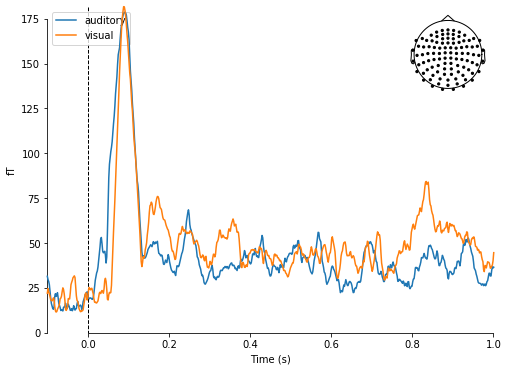

[<Figure size 576x432 with 2 Axes>]

In [28]:
left_evoked = left_epochs.average()
right_evoked = right_epochs.average()

fname = '/home/vera/MNE/Examples/evoked_audio_left_right-ave.fif'
mne.write_evokeds(fname, [left_evoked, right_evoked])

mne.viz.plot_compare_evokeds(dict(auditory=left_evoked, visual=right_evoked),
                             legend='upper left', show_sensors='upper right')

2) compeare evoked responses one channel

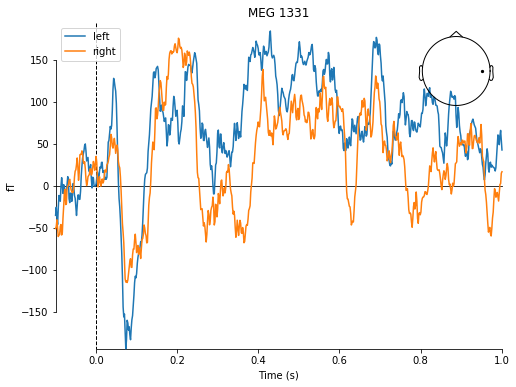

[<Figure size 576x432 with 2 Axes>]

In [29]:
mne.viz.plot_compare_evokeds(dict(left=left_evoked, right=right_evoked),
                             legend='upper left', show_sensors='upper right', picks='MEG 1331')

3) topomap audio/left vs audio/right var. 1

You are plotting to a topographical layout with >70 sensors. This can be extremely slow. Consider using mne.viz.plot_topo, which is optimized for speed.


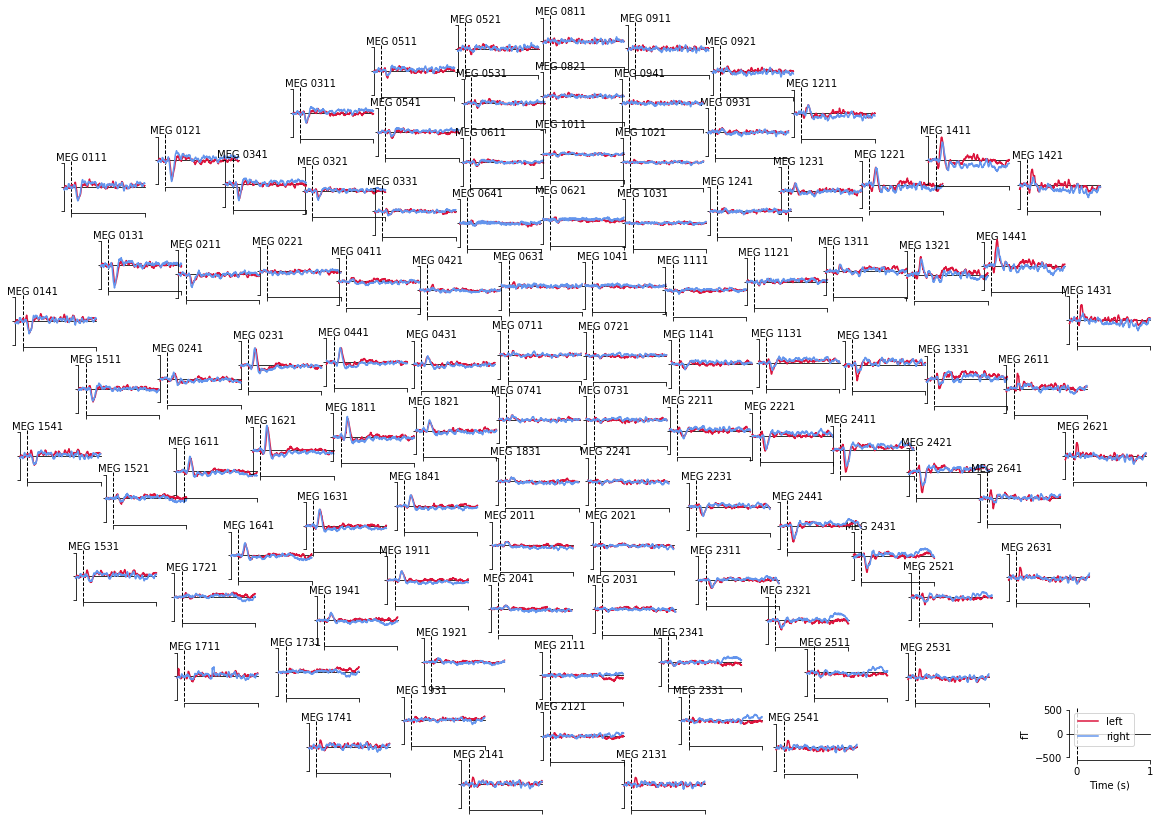

In [30]:
colors = dict(left="Crimson", right="CornFlowerBlue")
evoked_dict = dict(left=left_evoked, right=right_evoked)
r_l_topo_v1 = mne.viz.plot_compare_evokeds(evoked_dict, colors=colors, legend='upper left', axes="topo")

4) topomap audio/left vs audio/right var. 2

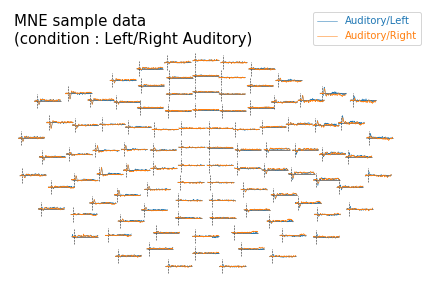

In [31]:
title = 'MNE sample data\n(condition : %s)'

r_l_topo_v2 = mne.viz.plot_evoked_topo([left_evoked, right_evoked], title=title % 'Left/Right Auditory',
                         background_color='w');

r_l_topo_v2.savefig('/home/vera/MNE/Examples/r_l_topo_v2.pdf')

In [32]:
t = np.linspace(-0.100, 1.0, num=10) # time points in ms , задается когда мы считаем эпохи
evoked_diff = mne.combine_evoked([left_evoked, -right_evoked], weights='equal')

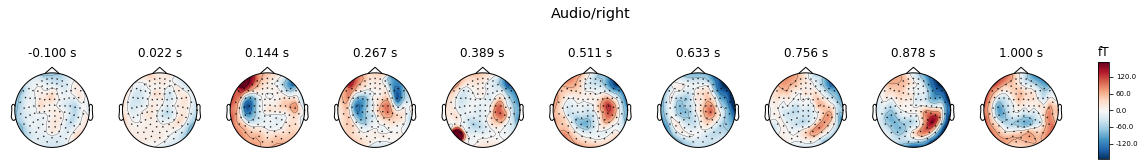

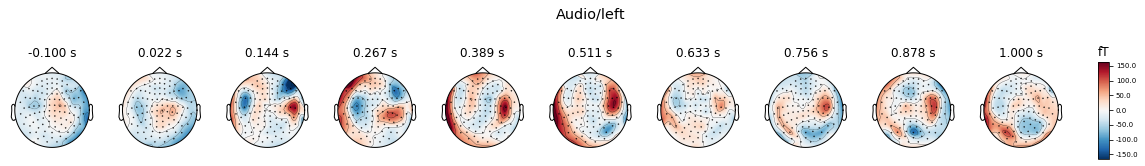

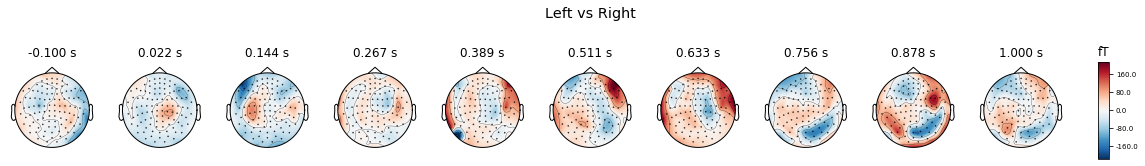

In [34]:
r_evo = right_evoked.plot_topomap(times = t, title ='Audio/right');
l_evo = left_evoked.plot_topomap(times = t, title = 'Audio/left'); 
diff_evo = evoked_diff.plot_topomap(times = t, title = 'Left vs Right');

In [35]:
r_evo.savefig('/home/vera/MNE/Examples/r_evo.jpeg')
l_evo.savefig('/home/vera/MNE/Examples/l_evo.jpeg')
diff_evo.savefig('/home/vera/MNE/Examples/diff_evo.jpeg')

Let's save all topomaps in one html report, and then convert it in pdf

In [36]:
file_name="/home/vera/MNE/Examples/my.html" #имя нашей страницы

text = '''
<!DOCTYPE html>
<html>
 <head>
  <meta charset="utf-8">
  <title>Проба пера</title>
 </head>
 <body>
  <p><img src="/home/vera/MNE/Examples/r_evo.jpeg" alt="Evoked audio/right"></p>
  <p><img src="/home/vera/MNE/Examples/l_evo.jpeg" alt="Evoked audio/left"></p>
  <p><img src="/home/vera/MNE/Examples/diff_evo.jpeg" alt="Evoked differents between audio left and right"></p>
  
 </body>
</html>
'''
    
f=open(file_name,"w")
f.write(text)
f.close()

In [37]:
import pdfkit
pdfkit.from_file('/home/vera/MNE/Examples/my.html', '/home/vera/MNE/Examples/my.pdf')

qt5ct: using qt5ct plugin
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
qt5ct: D-Bus system tray: no
Loading page (1/2)
Printing pages (2/2)                                               
Done                                                           


True